## Student Dropout Prediction for Online Learning Platform

## Project Goal:
To predict which students are likely to drop out based on behavioral, performance, and demographic data, and visualize insights using Power BI.

#### Step 1: Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Step 2: Load and Explore Data

In [2]:
data = pd.read_csv("personalized_learning_dataset.csv")

In [3]:
data.head()

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,S00001,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No
1,S00002,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No
2,S00003,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No
3,S00004,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No
4,S00005,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  10000 non-null  object
 1   Age                         10000 non-null  int64 
 2   Gender                      10000 non-null  object
 3   Education_Level             10000 non-null  object
 4   Course_Name                 10000 non-null  object
 5   Time_Spent_on_Videos        10000 non-null  int64 
 6   Quiz_Attempts               10000 non-null  int64 
 7   Quiz_Scores                 10000 non-null  int64 
 8   Forum_Participation         10000 non-null  int64 
 9   Assignment_Completion_Rate  10000 non-null  int64 
 10  Engagement_Level            10000 non-null  object
 11  Final_Exam_Score            10000 non-null  int64 
 12  Learning_Style              10000 non-null  object
 13  Feedback_Score              10000 non-null  int

In [5]:
data['Dropout_Likelihood'].value_counts()

Dropout_Likelihood
No     8043
Yes    1957
Name: count, dtype: int64

In [6]:
data.describe()

,Age,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Final_Exam_Score,Feedback_Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,32.137700,255.375400,2.500500,64.578600,24.616200,69.546800,64.697000,3.012600
std,10.062647,141.656392,1.122642,20.289125,14.330305,17.360782,20.096417,1.421423
min,15.000000,10.000000,1.000000,30.000000,0.000000,40.000000,30.000000,1.000000
25%,24.000000,131.000000,1.000000,47.000000,12.000000,54.000000,47.000000,2.000000
50%,32.000000,257.000000,3.000000,65.000000,25.000000,69.000000,65.000000,3.000000
75%,41.000000,378.000000,4.000000,82.000000,37.000000,85.000000,82.000000,4.000000
max,49.000000,499.000000,4.000000,99.000000,49.000000,99.000000,99.000000,5.000000


### Explanation:

info(): Checks data types and non-null values.

isnull().sum(): Helps find missing values.

describe(): Summary of numerical data (mean, std, etc.).

value_counts(): Check balance of dropout vs no-dropout.

#### Step 3: Clean the Data

In [7]:
data.isnull().sum()

Student_ID                    0
Age                           0
Gender                        0
Education_Level               0
Course_Name                   0
Time_Spent_on_Videos          0
Quiz_Attempts                 0
Quiz_Scores                   0
Forum_Participation           0
Assignment_Completion_Rate    0
Engagement_Level              0
Final_Exam_Score              0
Learning_Style                0
Feedback_Score                0
Dropout_Likelihood            0
dtype: int64

In [8]:
data = data.dropna()  # Remove rows with missing values

In [9]:
# Drop Student_ID as it's an identifier
data_cleaned = data.drop(columns=['Student_ID'])

# Convert categorical columns to lowercase strings
cat_cols = data_cleaned.select_dtypes(include='object').columns
data_cleaned[cat_cols] = data_cleaned[cat_cols].apply(lambda x: x.str.lower())

# Convert target variable to binary
data_cleaned['Dropout_Likelihood'] = data_cleaned['Dropout_Likelihood'].map({'yes': 1, 'no': 0})


#### Explanation:

1. Dropping non-informative columns. Student_ID

2. Standardized categorical text data by converting to lowercase.

3. Converted target variable (Dropout_Likelihood) from categorical ("yes"/"no") to binary (1/0).

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  10000 non-null  object
 1   Age                         10000 non-null  int64 
 2   Gender                      10000 non-null  object
 3   Education_Level             10000 non-null  object
 4   Course_Name                 10000 non-null  object
 5   Time_Spent_on_Videos        10000 non-null  int64 
 6   Quiz_Attempts               10000 non-null  int64 
 7   Quiz_Scores                 10000 non-null  int64 
 8   Forum_Participation         10000 non-null  int64 
 9   Assignment_Completion_Rate  10000 non-null  int64 
 10  Engagement_Level            10000 non-null  object
 11  Final_Exam_Score            10000 non-null  int64 
 12  Learning_Style              10000 non-null  object
 13  Feedback_Score              10000 non-null  int

In [11]:
cat_cols

Index(['Gender', 'Education_Level', 'Course_Name', 'Engagement_Level',
       'Learning_Style', 'Dropout_Likelihood'],
      dtype='object')

----- We have added feature od 'String' type to cat_cols and replace yes with 1 and no with 0 in Droupout_likelihood

In [12]:
data_cleaned.head(10)

,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,15,female,high school,machine learning,171,4,67,2,89,medium,51,visual,1,0
1,49,male,undergraduate,python basics,156,4,64,0,94,medium,92,reading/writing,5,0
2,20,female,undergraduate,python basics,217,2,55,2,67,medium,45,reading/writing,1,0
3,37,female,undergraduate,data science,489,1,65,43,60,high,59,visual,4,0
4,34,female,postgraduate,python basics,496,3,59,34,88,medium,93,visual,3,0
5,34,male,undergraduate,web development,184,1,87,34,70,medium,43,visual,4,0
6,45,male,high school,cybersecurity,454,3,69,46,83,low,37,kinesthetic,5,0
7,47,male,high school,cybersecurity,425,2,62,23,52,high,35,reading/writing,5,0
8,48,male,undergraduate,cybersecurity,359,1,59,10,88,medium,49,reading/writing,2,0
9,45,female,undergraduate,data science,263,4,63,30,99,low,61,auditory,3,0


#### Step 4: Exploratory Data Analysis (EDA)

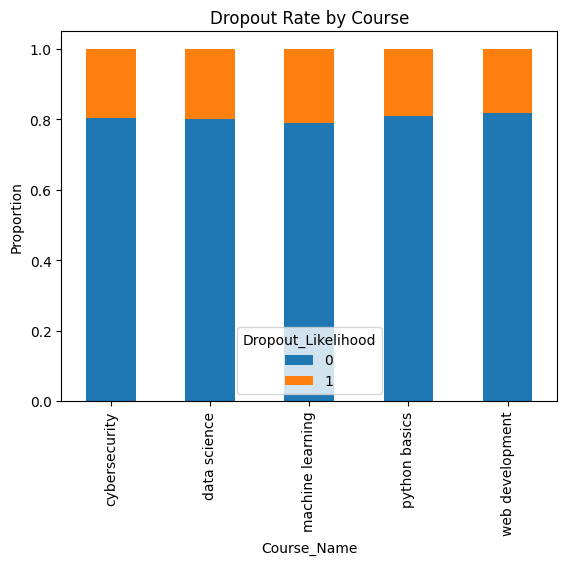

In [13]:
# Dropout by Course

dropout_by_course = data_cleaned.groupby('Course_Name')['Dropout_Likelihood'].value_counts(normalize=True).unstack()
dropout_by_course.plot(kind='bar', stacked=True)
plt.title("Dropout Rate by Course")
plt.ylabel("Proportion")
plt.show()

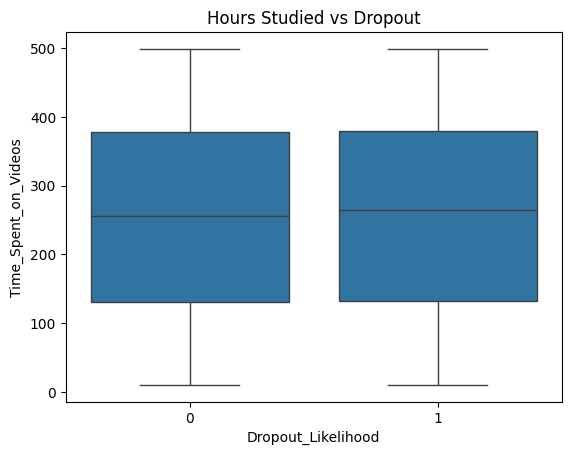

In [14]:
#Time vs Dropout

sns.boxplot(data=data_cleaned, x='Dropout_Likelihood', y='Time_Spent_on_Videos')
plt.title("Hours Studied vs Dropout")
plt.show()

Text(0.5, 1.0, 'Dropout by Gender')

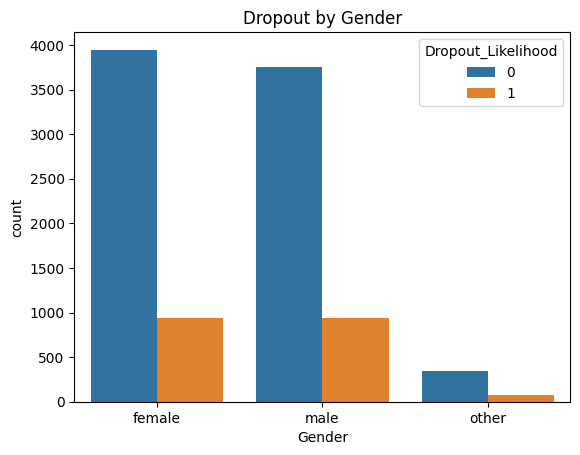

In [15]:
# Dropout vs Gender

sns.countplot(x='Gender', hue='Dropout_Likelihood', data=data_cleaned)
plt.title('Dropout by Gender')

<Axes: xlabel='Time_Spent_on_Videos', ylabel='Count'>

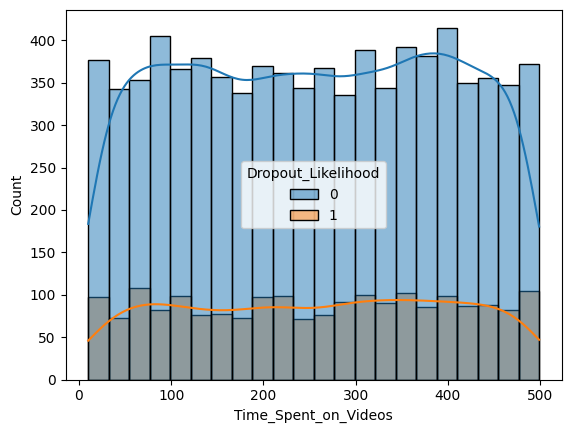

In [16]:
# Distribution of Time Spent on Videos

sns.histplot(data=data_cleaned, x='Time_Spent_on_Videos', hue='Dropout_Likelihood', kde=True)

Text(0.5, 1.0, 'Age Distribution by Dropout Status')

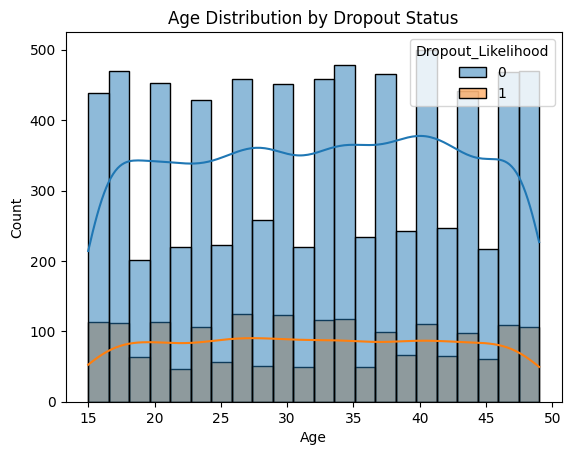

In [17]:
#Age vs Dropout

sns.histplot(data=data_cleaned, x='Age', hue='Dropout_Likelihood', kde=True)
plt.title('Age Distribution by Dropout Status')

Text(0.5, 1.0, 'Average Time Spent on Videos by Dropout Likelihood')

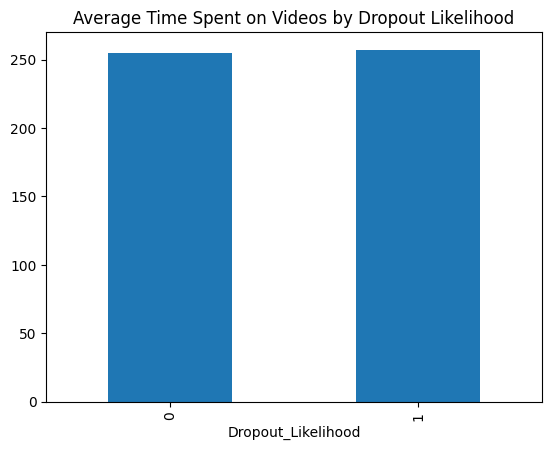

In [18]:
#Avg time spent by dropout

data_cleaned.groupby('Dropout_Likelihood')['Time_Spent_on_Videos'].mean().plot(kind='bar')
plt.title('Average Time Spent on Videos by Dropout Likelihood')

Text(0.5, 1.0, 'Dropout Likelihood by Education Level')

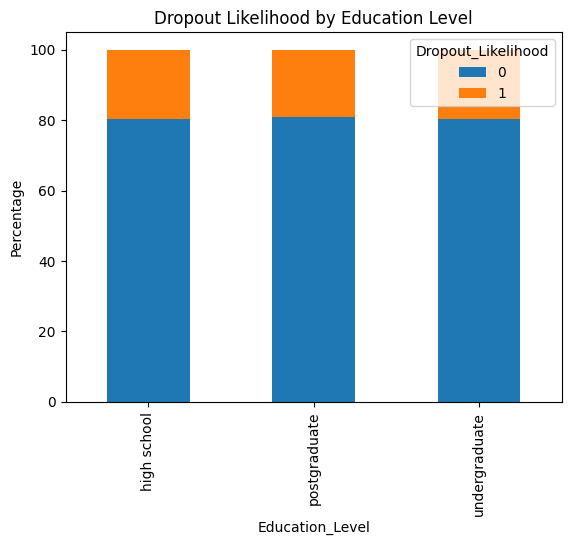

In [19]:
# Dropout by Education Level

edu_dropout = pd.crosstab(data_cleaned['Education_Level'], data_cleaned['Dropout_Likelihood'], normalize='index') * 100
edu_dropout.plot(kind='bar', stacked=True)
plt.ylabel("Percentage")
plt.title("Dropout Likelihood by Education Level")

#### Step 5: Encoding Categorical Variables

In [20]:
cat_cols = ['Gender', 'Education_Level', 'Course_Name', 'Engagement_Level', 'Learning_Style']
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [21]:
data=data_encoded.drop(['Student_ID'],axis=1)
data

,Age,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Final_Exam_Score,Feedback_Score,Dropout_Likelihood,Gender_Male,...,Education_Level_Undergraduate,Course_Name_Data Science,Course_Name_Machine Learning,Course_Name_Python Basics,Course_Name_Web Development,Engagement_Level_Low,Engagement_Level_Medium,Learning_Style_Kinesthetic,Learning_Style_Reading/Writing,Learning_Style_Visual
0,15,171,4,67,2,89,51,1,No,False,...,False,False,True,False,False,False,True,False,False,True
1,49,156,4,64,0,94,92,5,No,True,...,True,False,False,True,False,False,True,False,True,False
2,20,217,2,55,2,67,45,1,No,False,...,True,False,False,True,False,False,True,False,True,False
3,37,489,1,65,43,60,59,4,No,False,...,True,True,False,False,False,False,False,False,False,True
4,34,496,3,59,34,88,93,3,No,False,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26,162,2,87,27,73,68,2,No,False,...,True,False,True,False,False,False,True,True,False,False
9996,37,447,2,39,10,68,46,1,Yes,True,...,False,False,True,False,False,False,True,False,True,False
9997,40,105,4,50,23,41,64,1,No,False,...,False,False,True,False,False,False,False,False,False,True
9998,44,245,2,84,39,85,38,2,No,True,...,False,False,False,True,False,False,True,False,False,True


ML models can't handle text. get_dummies() converts categorical columns into numerical format using one-hot encoding.
drop_first=True avoids the dummy variable trap (multicollinearity).

#### Step 6: Splitting Features and Target

In [22]:
X=data.drop(['Dropout_Likelihood'],axis=1)
Y=data['Dropout_Likelihood']

X is your input (independent variables), and Y is the output (dependent variable).
Needed to train any supervised learning model.

#### Step 7: Handling Class Imbalance with SMOTE

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(X, Y)

SMOTE (Synthetic Minority Oversampling Technique) generates synthetic samples of the minority class to balance the dataset.
Class imbalance leads to biased models; SMOTE improves fairness and performance.

#### Step 7: Model Training

In [24]:
from sklearn.model_selection import train_test_split
x_train_scaled,x_test_scaled,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

Split into training and testing sets (70-30).
stratify=y ensures class distribution remains balanced in both sets.

In [25]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

print("\nClassification Report:\n",classification_report(y_test,y_pred))

acc = accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)


Classification Report:
               precision    recall  f1-score   support

          No       0.78      0.91      0.84      2413
         Yes       0.90      0.75      0.81      2413

    accuracy                           0.83      4826
   macro avg       0.84      0.83      0.83      4826
weighted avg       0.84      0.83      0.83      4826

Accuracy Score: 0.8300870285951099


#### Step 8: Testing Model

In [26]:
# Sample input (adjust based on your original unencoded feature names and values)
sample_input = {
    'Age': 21,
    'Attendance_Rate': 0.85,
    'Gender_male': 1,
    'Education_Level_graduate': 0,
    'Education_Level_postgraduate': 1,
    'Course_Name_data science': 1,
    'Course_Name_machine learning': 0,
    'Engagement_Level_medium': 1,
    'Engagement_Level_low': 0,
    'Learning_Style_visual': 1,
    'Learning_Style_auditory': 0,
  
}

# Convert to DataFrame
sample_df = pd.DataFrame([sample_input])

# Ensure all expected columns are present in the same order
missing_cols = set(X.columns) - set(sample_df.columns)
for col in missing_cols:
    sample_df[col] = 0  # Add missing columns with default 0

# Reorder columns to match training data
sample_df = sample_df[X.columns]

# Predict the class (0 = No Dropout, 1 = Dropout)
sample_prediction = model.predict(sample_df)
print("Predicted Dropout Likelihood:", "Yes" if sample_prediction[0] == 1 else "No")


Predicted Dropout Likelihood: No
